## Observations and Insights 

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [86]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [87]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [88]:
# Combine the data into a single dataset
mouse_study_complete_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
# Display the data table for preview
mouse_study_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [89]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [90]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# This returns all duplicates except the first occurrence of each (Keep = First or Last) 
mouse_study_duplicates_df = mouse_study_complete_df[mouse_study_complete_df.duplicated(['Mouse ID','Timepoint'],keep = 'first')]
mouse_study_duplicates_df
# This shows there are 5 duplicate rows 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [91]:
# Optional: Get all the data for the duplicate mouse ID. 
# This returns all duplicate data where Mouse ID and Timpoint are duplicated, setting Keep = First or Last, keeps the first or last row
# of the duplicated set. 
# returns just the last or first duplicated row.
mouse_study_duplicates_all_df = mouse_study_complete_df[mouse_study_complete_df.duplicated(['Mouse ID','Timepoint'],keep = False)]
mouse_study_duplicates_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_complete_df.drop_duplicates(['Mouse ID','Timepoint'],keep = 'first')
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [93]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean_df['Mouse ID'].count()

1888

## Summary Statistics

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimen_tumor_df1 = mouse_study_clean_df[['Drug Regimen','Tumor Volume (mm3)']]
drug_regimen_tumor_grouped1 = drug_regimen_tumor_df1.groupby('Drug Regimen')

drtg1_mean = drug_regimen_tumor_grouped1.mean()
drtg1_median = drug_regimen_tumor_grouped1.median()
drtg1_var = drug_regimen_tumor_grouped1.var()
drtg1_std = drug_regimen_tumor_grouped1.std()
drtg1_SEM = drug_regimen_tumor_grouped1.sem()

combined_drug_regimen_summary = pd.merge(drtg1_mean,drtg1_median,how='left',on =['Drug Regimen'])
combined_drug_regimen_summary = pd.merge(combined_drug_regimen_summary, drtg1_var,how='left',on =['Drug Regimen'])
combined_drug_regimen_summary = pd.merge(combined_drug_regimen_summary, drtg1_std,how='left',on =['Drug Regimen'])
combined_drug_regimen_summary = pd.merge(combined_drug_regimen_summary, drtg1_SEM,how='left',on =['Drug Regimen'])

combined_drug_regimen_summary.columns = ['Mean','Median','Variance','Standard Deviation','SEM']
combined_drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
drug_regimen_tumor_df = mouse_study_clean_df[['Drug Regimen','Tumor Volume (mm3)']]
drug_regimen_tumor_grouped = drug_regimen_tumor_df.groupby('Drug Regimen')

drtg = drug_regimen_tumor_grouped.agg([np.mean,np.median,np.var,np.std,st.sem])
drtg.columns = ['Mean','Median','Variance','Standard Deviation','SEM']
drtg

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [172]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_study_clean_df
mouse_study_groupby_df = pd.DataFrame(mouse_study_clean_df.groupby(['Drug Regimen']).count()['Mouse ID'])
mouse_study_groupby_df= mouse_study_groupby_df.rename(columns = { 'Mouse ID' : "Number of Mice"})
mouse_study_groupby_df

,Number of Mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


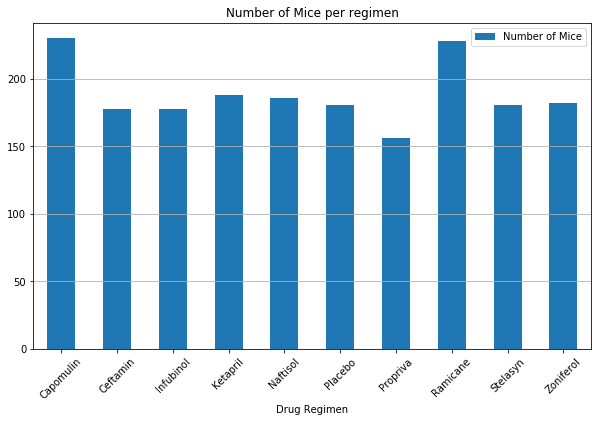

In [243]:
#1 Using Pandas dataframe.plot
mouse_study_groupby_df.plot(kind="bar", figsize=(10,6), rot = 45, legend = True)
plt.title("Number of Mice per regimen")
plt.grid(axis = 'y')
plt.show()


In [225]:
mouse_study_clean_df
mouse_study_groupby_df = pd.DataFrame(mouse_study_clean_df.groupby(['Drug Regimen']).count()['Mouse ID'])
mouse_study_groupby_df= mouse_study_groupby_df.rename(columns = { 'Mouse ID' : "Number of Mice"})
#mouse_study_groupby_df.add_index()
mouse_study_groupby_df

,Number of Mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [232]:
mouse_study_groupby_df.index.values

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

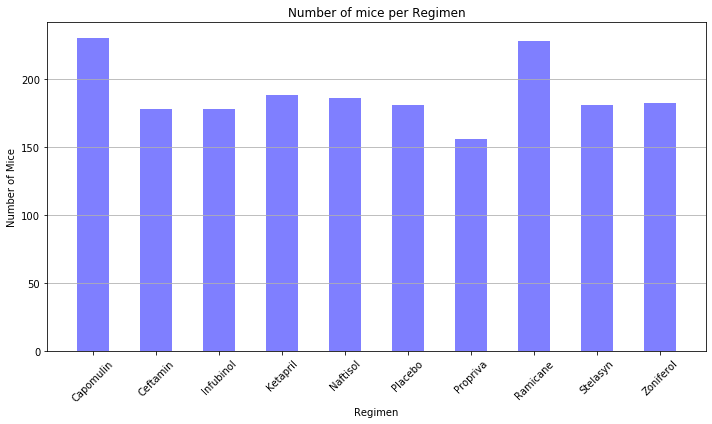

In [256]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mouse_study_groupby_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,6))
plt.bar(x_axis, mouse_study_groupby_df["Number of Mice"], color='b', alpha=0.5, align="center" , width = .5)

plt.xticks(tick_locations, mouse_study_groupby_df.index, rotation="45")
plt.title("Number of mice per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
